
1a) Identifiering av nollställen


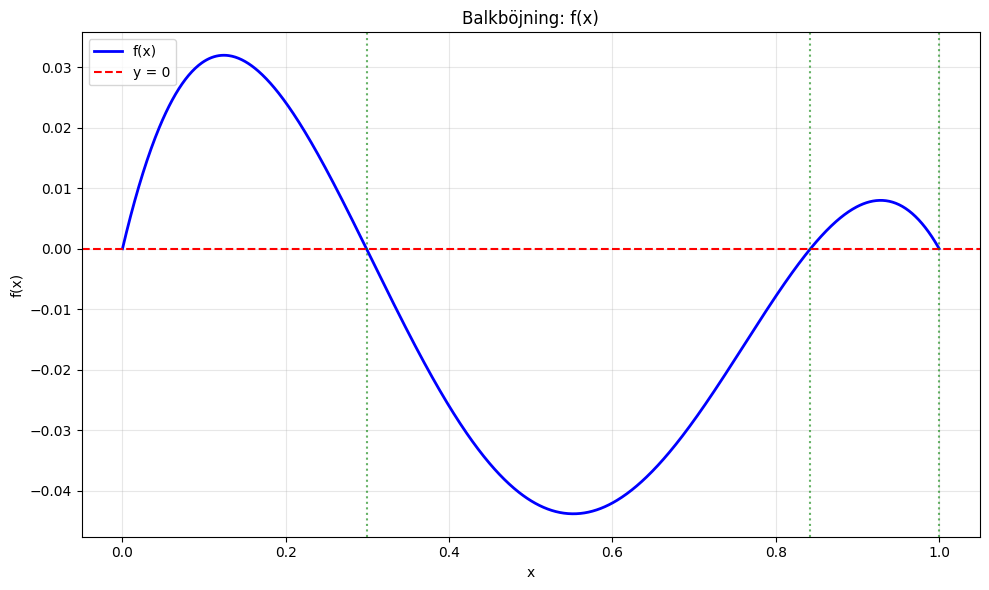

Antal nollställen: 3
  Nollställe 1: x ≈ 0.2988
  Nollställe 2: x ≈ 0.8423
  Nollställe 3: x ≈ 0.9995

1b) Konvergensanalys


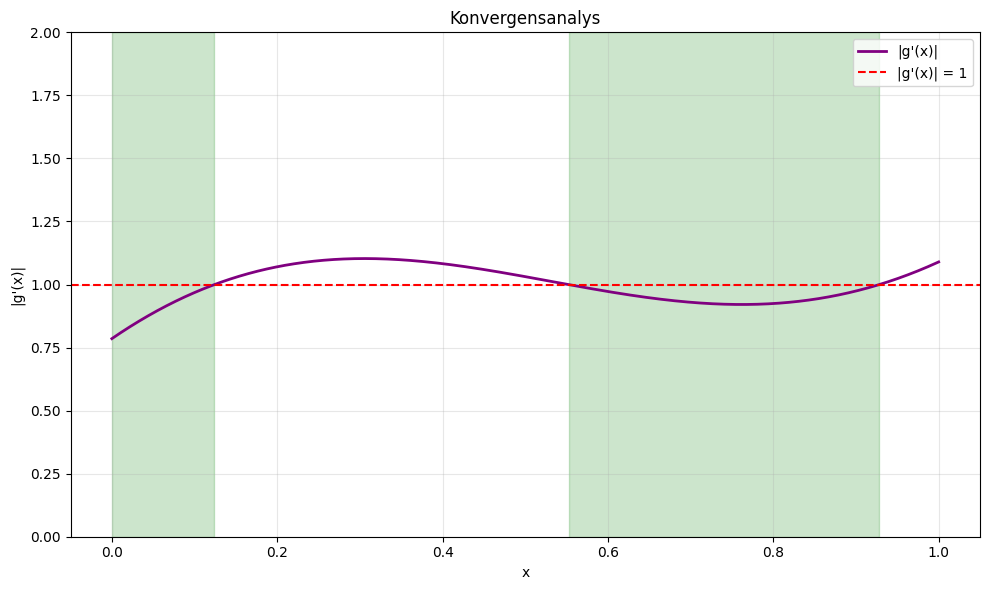

Analys (konvergerar om |g'(x)| < 1):
  Nollställe 1 (x≈0.299): |g'(x)|=1.103 → Nej
  Nollställe 2 (x≈0.842): |g'(x)|=0.938 → Ja
  Nollställe 3 (x≈0.999): |g'(x)|=1.089 → Nej

1c) Fixpunktsmetoden
Startvärde: x0 = 0.85

  n             x_n         |Δx|
  1    0.8495444999     4.56e-04
  2    0.8491155757     4.29e-04
  3    0.8487117696     4.04e-04
  4    0.8483316926     3.80e-04
  5    0.8479740224     3.58e-04
 20    0.8445785572     1.41e-04
 40    0.8430217779     4.00e-05
 60    0.8425836632     1.12e-05
 80    0.8424610551     3.13e-06
100    0.8424267963     8.74e-07
120    0.8424172279     2.44e-07
140    0.8424145558     6.82e-08
160    0.8424138097     1.90e-08
180    0.8424136013     5.32e-09
200    0.8424135431     1.48e-09
220    0.8424135269     4.15e-10
240    0.8424135223     1.16e-10
243    0.8424135220     9.56e-11

Resultat: x = 0.8424135220 (243 iter)
Verifiering: f(x) = 2.39e-10

1d) Newtons metod
Startvärde: x0 = 0.25

  n             x_n         |Δx|
  1    0.30

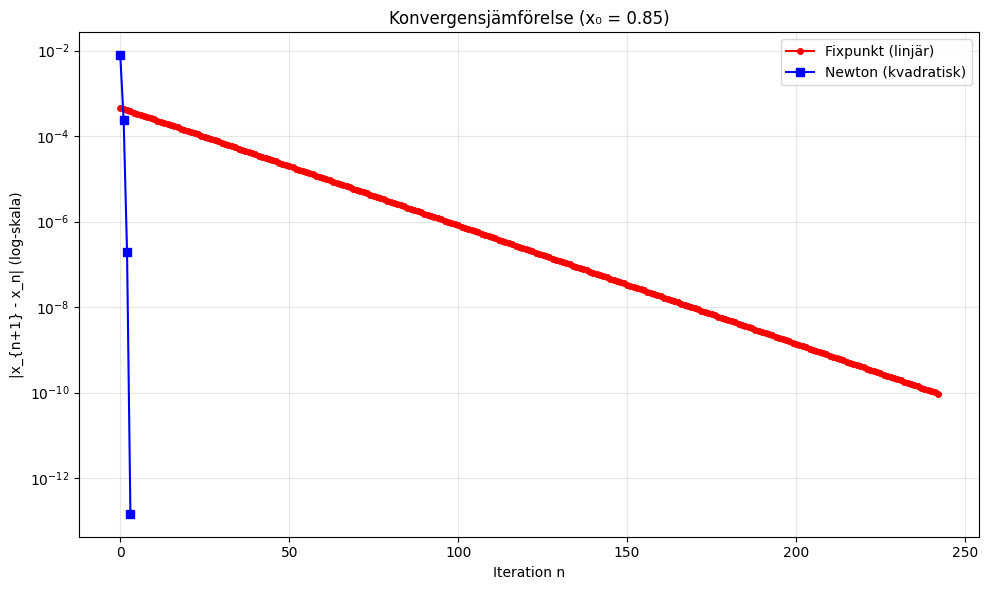

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 26 14:40:10 2026

@author: ebbaelvelid
"""
import numpy as np
import matplotlib.pyplot as plt
import os

def clear_console():
    os.system('clear')

L = 1.0
tol = 1e-10
max_iter = 300

f = lambda x: (8/3)*(x/L) - 3*(x/L)**2 + (1/3)*(x/L)**3 - (2/3)*np.sin(np.pi*x/L)
df = lambda x: (8/3)*(1/L) - 6*(x/L)*(1/L) + (x/L)**2*(1/L) - (2/3)*(np.pi/L)*np.cos(np.pi*x/L)
g = lambda x: (3*L/8)*(3*(x/L)**2 - (1/3)*(x/L)**3 + (2/3)*np.sin(np.pi*x/L))
dg = lambda x: (3*L/8)*(6*(x/L)*(1/L) - (x/L)**2*(1/L) + (2/3)*(np.pi/L)*np.cos(np.pi*x/L))

def uppgift_1a():
    """Plotta f(x) och hitta nollställen genom teckenbyte"""
    print("\n1a) Identifiering av nollställen")
    
    x = np.linspace(0, L, 1000)
    y = f(x)
    
    # Hitta nollställen via teckenbyte
    zeros = []
    for i in range(len(y)-1):
        if y[i] * y[i+1] < 0:
            zeros.append((x[i] + x[i+1]) / 2)
    
    # Plotta
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', linewidth=2, label='f(x)')
    plt.axhline(0, color='r', linestyle='--', label='y = 0')
    for z in zeros:
        plt.axvline(z, color='g', linestyle=':', alpha=0.6)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Balkböjning: f(x)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Antal nollställen: {len(zeros)}")
    for i, z in enumerate(zeros, 1):
        print(f"  Nollställe {i}: x ≈ {z:.4f}")
    
    return zeros

def uppgift_1b(zeros):
    """
    Fixpunktsmetoden konvergerar om |g'(x*)| < 1
    """
    print("\n1b) Konvergensanalys")
    
    x = np.linspace(0, L, 1000)
    dg_vals = np.abs(dg(x))
    
    # Plotta |g'(x)|
    plt.figure(figsize=(10, 6))
    plt.plot(x, dg_vals, 'purple', linewidth=2, label="|g'(x)|")
    plt.axhline(1, color='r', linestyle='--', label="|g'(x)| = 1")
    plt.fill_between(x, 0, 2, where=(dg_vals < 1), alpha=0.2, color='green')
    plt.xlabel('x')
    plt.ylabel("|g'(x)|")
    plt.title("Konvergensanalys")
    plt.ylim(0, 2)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("Analys (konvergerar om |g'(x)| < 1):")
    for i, z in enumerate(zeros, 1):
        dg_val = np.abs(dg(z))
        status = "Ja" if dg_val < 1 else "Nej"
        print(f"  Nollställe {i} (x≈{z:.3f}): |g'(x)|={dg_val:.3f} → {status}")

def fixpunkt(g, x0, tol, max_iter, verbose=True):
    """
    Fixpunktsiteration: x_{n+1} = g(x_n)
    Linjär konvergens (p=1)
    """
    x = x0
    n = 0
    
    if verbose:
        print(f"\n{'n':>3} {'x_n':>15} {'|Δx|':>12}")
    
    while n < max_iter:
        n += 1
        xold = x
        x = g(xold)
        dx = np.abs(x - xold)
        
        if verbose and (n <= 5 or n % 20 == 0 or dx < tol):
            print(f"{n:3d} {x:15.10f} {dx:12.2e}")
        
        if dx < tol:
            break
    
    if verbose:
        print(f"\nResultat: x = {x:.10f} ({n} iter)")
        print(f"Verifiering: f(x) = {f(x):.2e}")
    
    return x, n


def uppgift_1c():
    print("\n1c) Fixpunktsmetoden")
    # x0 = 0.85 ger konvergens till x ≈ 0.84
    x0 = 0.85
    print(f"Startvärde: x0 = {x0}")
    root, iters = fixpunkt(g, x0, tol, max_iter)
    return root, iters

def newton(f, df, x0, tol, max_iter, verbose=True):
    """
    Newtons metod: x_{n+1} = x_n - f(x_n)/f'(x_n)
    Kvadratisk konvergens (p=2)
    """
    x = x0
    n = 0
    
    if verbose:
        print(f"\n{'n':>3} {'x_n':>15} {'|Δx|':>12}")
    
    while n < max_iter:
        n += 1
        dfx = df(x)
        
        if np.abs(dfx) < 1e-15:
            raise RuntimeError("Derivatan ≈ 0")
        
        xold = x
        x = xold - f(xold) / dfx
        dx = np.abs(x - xold)
        
        if verbose:
            print(f"{n:3d} {x:15.10f} {dx:12.2e}")
        
        if dx < tol:
            break
    
    if verbose:
        print(f"\nResultat: x = {x:.10f} ({n} iter)")
        print(f"Verifiering: f(x) = {f(x):.2e}")
    
    return x, n


def uppgift_1d():
    print("\n1d) Newtons metod")
    # Välj nollställe där fixpunkt EJ konvergerar
    x0 = 0.25
    print(f"Startvärde: x0 = {x0}")
    root, iters = newton(f, df, x0, tol, max_iter)
    return root, iters

def uppgift_1e():
    """
    Jämför konvergenshastighet
    """
    print("\n1e) Konvergensjämförelse")
    
    # Startvärde där båda konvergerar till samma nollställe
    x0 = 0.85
    print(f"Startvärde: x0 = {x0}\n")
    
    # Fixpunkt (spara alla x-värden för plottning)
    print("Fixpunkt:")
    x_fp = x0
    hist_fp = [x_fp]
    for _ in range(max_iter):
        xold = x_fp
        x_fp = g(xold)
        hist_fp.append(x_fp)
        if np.abs(x_fp - xold) < tol:
            break
    err_fp = [np.abs(hist_fp[i+1] - hist_fp[i]) for i in range(len(hist_fp)-1)]
    print(f"  Konvergerade till x = {x_fp:.10f} ({len(err_fp)} iter)")
    
    # Newton
    print("\nNewton:")
    x_n = x0
    hist_n = [x_n]
    for _ in range(max_iter):
        xold = x_n
        x_n = xold - f(xold) / df(xold)
        hist_n.append(x_n)
        if np.abs(x_n - xold) < tol:
            break
    err_n = [np.abs(hist_n[i+1] - hist_n[i]) for i in range(len(hist_n)-1)]
    print(f"  Konvergerade till x = {x_n:.10f} ({len(err_n)} iter)")
    
    print(f"\nKvot: {len(err_fp)/len(err_n):.1f}x fler iterationer för fixpunkt")
    
    plt.figure(figsize=(10, 6))
    plt.semilogy(err_fp, 'o-', color='red', label='Fixpunkt (linjär)', markersize=4)
    plt.semilogy(err_n, 's-', color='blue', label='Newton (kvadratisk)', markersize=6)
    plt.xlabel('Iteration n')
    plt.ylabel('|x_{n+1} - x_n| (log-skala)')
    plt.title(f'Konvergensjämförelse (x₀ = {x0})')
    plt.legend()
    plt.grid(True, which='both', alpha=0.3)
    plt.tight_layout()
    plt.show()


def main():
    clear_console()
    zeros = uppgift_1a()
    uppgift_1b(zeros)
    uppgift_1c()
    uppgift_1d()
    uppgift_1e()


if __name__ == "__main__":
    main()